In [83]:
# Initialize Otter
import otter
grader = otter.Notebook("Homework_02.ipynb")

# Homework 02:  Linear Regression in Theory and Practice

In this homework, you will learn how to create and explore a simple, synthetic regression dataset using scikit‐learn’s `make_regression` function. We often use synthetic data to test out our modeling workflows, gain practical experience with various models, and observe how noise, training set size, and other factors affect model performance, as measured by the Mean Squared Error (MSE). By controlling the dataset generation, we can see precisely how well the model approximates the dataset parameters, and you’ll practice splitting data into training and testing sets to estimate how well the model will generalize to unseen data. This will give you insight into how regression models behave under different conditions (such as varying amounts of training data) and help you interpret outcomes with appropriate metrics. 

In some problems you will need to do a bit of research in `sklearn`'s documentation. The functions we are using are very common in ML, and it will be well worth the time you spend reading through the documentation and looking at the examples provided there. 

As I mentioned in the first Live Session, some things I will ask you do to are not graded; I expect you to do them just as thoroughly as the answers which will be graded.  To skip the non-graded parts
and just focus on the graded portions will waste your time and money, and result in a less-than-expected return on both when you work on projects and proceed to later modules, and, eventually, to a career in data science. 

#### One more things before you start:  

This is the last homework in which you will get instant feedback on all your solutions; since Gradescope is not set up for this, we have used the Otter auto-grader to allow immediate feedback in this notebook. After each cell in which you assign a value to a variable such as a1a etc. there is a cell which will check your solution. Therefore, you may test your solutions as much as you wish before submitting to Gradescope. Starting with HW 03, you will continue to have graded and ungraded problems, but you will not receive feedback on the graded parts until after the late submission period is over. 

In [84]:
# Useful imports and utilities

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import kagglehub
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing,make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from math import isclose

# globals

random_state = 42


## Problem One:  Generate and Display a Simple Univariant Regression Dataset

In this first problem, we are going to experiment with `sklearn`'s `make_regression` function, which can generate synthetic datasets with various characteristics, including the number of samples, the standard deviation of the errors, and many, many others.   Oddly, it makes you choose the bias, but then it randomly chooses the other coefficients; it also does not allow you to specify the range of the features -- however, it would be easy to write your own version which does these things.


Using `make_regression` is a commonly used to test out frameworks and investigate the properties of models; we'll use it again when we investigate feature selection strategies in Week 5.


Before you start, read through the `sklearn` documentation on `make_regression`. 



### Part A

Generate a univariate dataset $X, y$ using `make_regression` with
   - 20 samples
   - error standard deviation of 20 (called `noise` in the function)
   - y-intercept of 0.5 (called `bias` in the function)
   - `random_state = 42`
   - `coef = True`  (this will return the coefficients of the underlying model)
   
This will return a tuple with 3 values (read the docs!). 

In [85]:

# Your code here 
X, y, coef = make_regression(n_samples=20, 
                             n_features=1, 
                             noise=20, 
                             bias=0.5, 
                             random_state=42, 
                             coef=True)

### Part B

- Set `a1b` to the range of `X`, i.e., a list `[lb,ub]` (or tuple or array) where `lb` is the smallest value in `X` and `ub` is the largest, both rounded to 4 decimal places.
- Note: You can use `np.around(...)` for just about anything, including floats and tuples.  For numpy arrays, generally it is more readable to use the postfix version  `.round(...)`

In [86]:

# Your code here
lb, ub = np.min(X), np.max(X)
a1b = [round(lb, 4), round(ub, 4)]

print(f'Range of X = {a1b}')

Range of X = [np.float64(-1.9133), np.float64(1.5792)]


In [87]:
grader.check("q1b")

q1b results: All test cases passed!

### Part C

- Set `a1c` to the slope of the underlying model, to 4 decimal places. 

- Hint: `make_regression` will return the coefficients as an array with one fewer dimensions than `X`; in this case, it is a 0-dimension array whose shape is `()`.  Weird, I know, but this is unusual.  You can pretend it is just a float. 

In [88]:

# Your code here

a1c = np.around(coef, 4)

print(f'Slope = {a1c}')

Slope = 45.607


In [89]:
grader.check("q1c")

q1c results: All test cases passed!

### Part D

Generate a scatterplot of the dataset with the following:
   - A suitable title
   - Figure size of (8,6)
   - Suitable labels on x and y axis (just `X` and y are fine)
   - The underlying model (with no noise), a line extending through the range of X, using `color=grey`
   - A label "Underlying Model" on the line representing the model and a label "Data Points" on
     the sample points. (Don't forget to call `plt.legend()` to show the labels!)

Note: Optional, but playing around with the style of the scatter points will produce a better-looking plot; I use `marker='.'` to get smaller dots for a scatterplot; you can
also play around with `linestyle='--'` or other choices, plus of course colors, saturation `alpha=0.5`, etc. 


<Figure size 800x600 with 0 Axes>

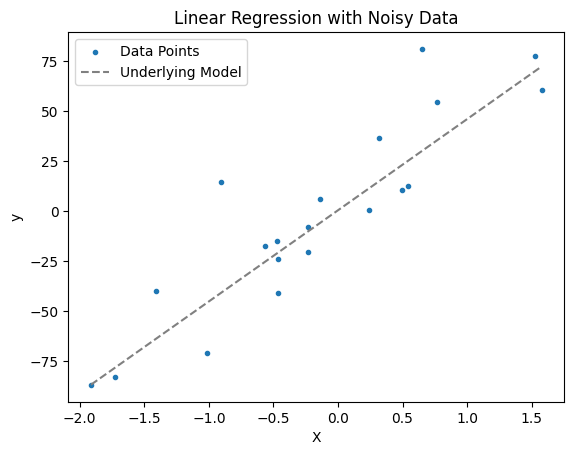

<Figure size 800x600 with 0 Axes>

In [90]:
# Your code here

X_D = np.linspace(lb, ub, 20)
y_D = coef * X_D + 0.5


plt.scatter(X, y, marker='.', label='Data Points')
plt.plot(X_D, y_D, color='grey', label="Underlying Model", linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title("Linear Regression with Noisy Data")
plt.figure(figsize = (8,6))


## Problem Two: Run Linear Regression on the Data Set and Evaluate the Results

Now we will use `sklearn`'s `LinearRegression` model to create a model from the dataset. Of course, the **underlying model** has already been
created, but your linear regression won't know that, and it has to determine the best model given the data samples it has.

### Part A: Create and Evaluate a Linear Model
- Create a linear regression model and train it on `X,y`. 
- Set `a2a` to the bias/y-intercept of the model, to 4 decimal places.            
- NOTE:  You must round the value assigned to `a2a`, NOT just print it out with 4 digits of precision.  


In [91]:

# Your code here

model_A = LinearRegression()
model_A.fit(X,y)
y_predicted = model_A.predict(X)

bias_2a = model_A.intercept_
a2a = np.around(bias_2a, 4)

print(f'Bias = {a2a}')


Bias = 5.2857


In [92]:
grader.check("q2a")

q2a results: All test cases passed!

### Part B

- Set `a2b` to the slope of the model.
- Hint: The coefficients are returned as a 1-dimensional array (unlike make_regression!), so you'll need to turn a 1-element array into a scalar. 


In [93]:
# Your code here

a2b = model_A.coef_[0]

print(f'Slope = {a2b}')


Slope = 45.712451437501926


In [94]:
grader.check("q2b")

q2b results: All test cases passed!

### Part C

- Set `a2c` to the **training MSE** of the model on the dataset, to 4 decimal places
- Hint: generate an array `y_pred` by using the model to predict the targets from the original `X`, then calculate the mean squared error using the appropriate `sklearn` function.  (Now might be a good time to look at that first code cell to see what I imported for you.)


In [95]:

# Your code here

a2c = mean_squared_error(y, y_predicted)

print(f'Training MSE = {a2c}')


Training MSE = 436.9129821094651


In [96]:
grader.check("q2c")

q2c results: All test cases passed!

### Part D

- Set `a2d` to the coefficient of determination (R2) of the model (read the docs!), to 4 decimal places


In [97]:

# Your code here

a2d = np.around(r2_score(y, y_predicted), 4)

print(f'Training MSE = {a2d}')


Training MSE = 0.8072


In [98]:
grader.check("q2d")

q2d results: All test cases passed!

### Part E

- Provide a visualization of the regression line by cutting and pasting the code from Problem One D, then adding a plot of the model's regression line in red. 

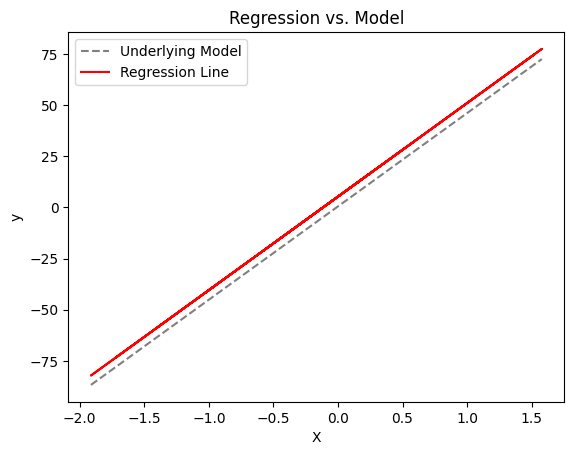

In [99]:

# Your code here

plt.plot(X_D, y_D, color='grey', label="Underlying Model", linestyle='--')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression vs. Model')
plt.legend()


### Pause and Ponder (no need to write answers, just think about these):  
- Why does the linear regression line not match the underlying model?
- Which parameters (`bias`, `n_samples`,`noise`) do you think affect how well the regression model matches the actual model?
- What changes to these parameters would result in a more accurate match between underlying and regression models?

## Problem Three:  How well does it generalize?

The **most important issue** in making useful models is to ensure that they are able to **generalize to new data from the same domain.**  For example, if you create a model from a housing price dataset, 
you want it to be able to predict what price could be obtained if you build new houses with particular features. You will learn techniques for judging how well models generalize in
the next few lessons, and it will continue to be a crucial issue going forward. 

For now, since we have the underlying model (which never happens IRL!) we can easily create new data samples with the same characteristics as the set we used for training. 


### Part A

- Complete the following stub to create a function to create new points to add the data set, with all the same parameters as the underlying model, following these steps:
    1. Create a random number within the existing range of`X`, using `np.random.uniform` 
    2. Use the bias and slope of the underlying model to find the point (x,y) on the regression line (which is the prediction for y given x)
    3. Return (x,y)

- Test it by running the cell repeatedly to see the results (we are not setting a random seed, so it will generate random answers)


In [100]:


np.random.seed(42)

def generate_sample():
    x_new = np.random.uniform(np.min(X), np.max(X))
    error = np.random.normal(0,20)
    y_new = coef * x_new + 0.5 + error
    return x_new, y_new

generate_sample()

(-0.6052014788299391, np.float64(-49.33902525074812))

### Part B

- Generate 5 new data points (we'll use these below as a **test set**) and assign them to ndarrays `X_new` and `y_new`, 
- Hint: create a list of pairs and split using `zip(* ...)`

- Set `a3b` to the first 2 values in `X_new`, rounded to 4 decimal places.

In [101]:

np.random.seed(42)             # do not remove this line!

# Your code here

new_points = [generate_sample() for _ in range(5)]
X_new, y_new = zip(*new_points)
X_new = np.array(X_new)
y_new = np.array(y_new)

a3b = np.around(X_new[:2], 4)

print(a3b)


[-0.6052 -1.3685]


In [102]:
grader.check("q3b")

q3b results: All test cases passed!

### Part C

- Cut and paste the code from Problem Two E and add one line of code to display the new data points in green, in addition to what you displayed in Problem Two. 


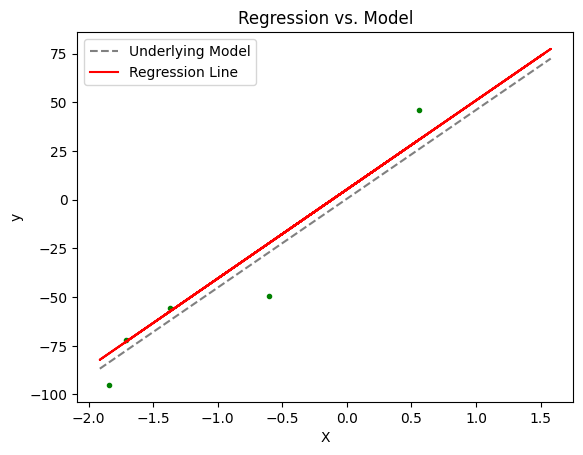

In [103]:
# Your code here

plt.plot(X_D, y_D, color='grey', label="Underlying Model", linestyle='--')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.scatter(X_new, y_new, color='green', marker='.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression vs. Model')
plt.legend()


### Part D

- Assign the MSE on the new data to `a3d` (we'll later call this the "test MSE") , rounded to 4 decimal points.
- Hint: When you "roll your own" datasets using ndarrays, you will generally have to reshape them using `.reshape(-1,1)` because `sklearn` models expect a column array, not a "normal" array. 


In [104]:

X_new = X_new.reshape(-1, 1)
y_pred = model_A.predict(X_new)


a3d = round(mean_squared_error(y_new, y_pred), 4)

print(f'MSE on new data = {a3d}')


MSE on new data = 245.9235


In [105]:
grader.check("q3d")

q3d results: All test cases passed!

### Part E:  Let's Compare Metrics

We now have three related values:
- Noise = standard deviation of "errors" between the data and the underlying model 
- Training MSE of the linear model on the dataset 
- Testing MSE of the linear model on new data generated with the same parameters as the original dataset

Answer the following multiple-choice problems by assigning the variable to the  **most accurate** statement.

#### E1) Comparing the Two MSEs

Why might the training MSE be *larger* than the testing MSE in this scenario?

1. These should be exactly the same, so there must have been an error somewhere.  
2.  With only 20 training points, a few unusual data points (outliers) can increase the average training error; meanwhile, the small test set of 5 points could *by chance* lead to smaller errors overall.  
3. There is always a positive bias in the regression line, so it will always be larger. 
4.  There is very little relationship between these two numbers, so the fact that they are close to each other must be an accident.  

In [106]:

a3e1 =  2            # your answer should one of 1, 2, 3, 4 



In [107]:
grader.check("q3e1")

q3e1 results: All test cases passed!

#### E2) Understanding the Noise Parameter
 
Suppose a dataset has been generated using `make_regression` with `noise = 20`.  

Which statement best explains the significance of the noise parameter when interpreting the MSE of models trained on this dataset?  

1. The square of the noise parameter, $20^2 = 400$, represents the irreducible noise in the data; no model can achieve an MSE lower than this on average.  
2. A noise standard deviation of 20 means the MSE can eventually be reduced to 0 with enough data.  
3. MSE measures the *average* absolute errors, so having $\sigma = 20$ implies the MSE will always equal 20.  
4. If the noise is 20, then it’s possible to create a model with training and testing MSEs that are *exactly* 400 with sufficient effort.  


In [108]:

a3e2 =  1           # your answer should one of 1, 2, 3, 4 


In [109]:
grader.check("q3e2")

q3e2 results: All test cases passed!

#### E3) The Role of Dataset Size

You fitted a linear model on **20** training points and tested it on **5** new points, both drawn from a process with noise standard deviation 20 (variance 400).  

What would happen if we repeated the same experiment with more training/testing points or with even fewer points?  
In other words, **how does dataset size affect the measured MSE values?**

1.  If the training set is small, the MSE will always be *exactly* 400 for both training and test sets, since there’s too little data to deviate from the noise variance.  

2.  Collecting more data actively *lowers* the true noise standard deviation from 20 to something smaller, guaranteeing an MSE below 400.  
3. If you have fewer than 30 data points, the training MSE must always exceed 400 and the test MSE must always be *less* than 400.  
4. Small sample sizes can cause large swings in MSE, sometimes pushing the training MSE above 400 while letting a tiny test set fall below 400 by chance. With larger datasets, the MSE typically stabilizes closer to 400.  

In [110]:

a3e3 = 4            # your answer should one of 1, 2, 3, 4  


In [111]:
grader.check("q3e3")

q3e3 results: All test cases passed!

## Problem Four: Linear Regression on an Actual Dataset (finally!)

Let's consider applying what we have learned to an actual dataset, the Diabetes dataset from Kaggle. This has 10 features and 1 target,
so it is an instance of **multiple regression**, however we can train a model almost exactly as we did in the univariate case. 

After doing a bit of EDA and massaging of the features, we will first consider separate regressions on a single feature of the dataset, and then run multiple regression on the whole set. 

In [112]:
# Download Kaggle Diabetes Dataset

from sklearn.datasets import load_diabetes

data_diabetes = load_diabetes(as_frame=True)
df_diabetes = pd.concat([data_diabetes.data, data_diabetes.target.rename('DiseaseProgression')], axis=1)

feature_names = df_diabetes.drop(columns=["DiseaseProgression"]).columns.tolist()

df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [113]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 442 non-null    float64
 1   sex                 442 non-null    float64
 2   bmi                 442 non-null    float64
 3   bp                  442 non-null    float64
 4   s1                  442 non-null    float64
 5   s2                  442 non-null    float64
 6   s3                  442 non-null    float64
 7   s4                  442 non-null    float64
 8   s5                  442 non-null    float64
 9   s6                  442 non-null    float64
 10  DiseaseProgression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


#### Features of the Diabetes Dataset

- **age**: age of the patient  
- **sex**: gender of the patient  
- **bmi**: body mass index (BMI)  
- **bp**:  mean blood pressure  
- **s1**:  measure of serum cholesterol levels  
- **s2**:  measure related to low-density lipoproteins (LDL)  
- **s3**:  measure of high-density lipoproteins (HDL)  
- **s4**:  measure of total cholesterol-to-HDL ratio  
- **s5**:  measure of serum triglycerides  
- **s6**:  measure of blood sugar levels  
- **DiseaseProgression**: Quantitative measure of diabetes disease progression one year after baseline (target variable)  



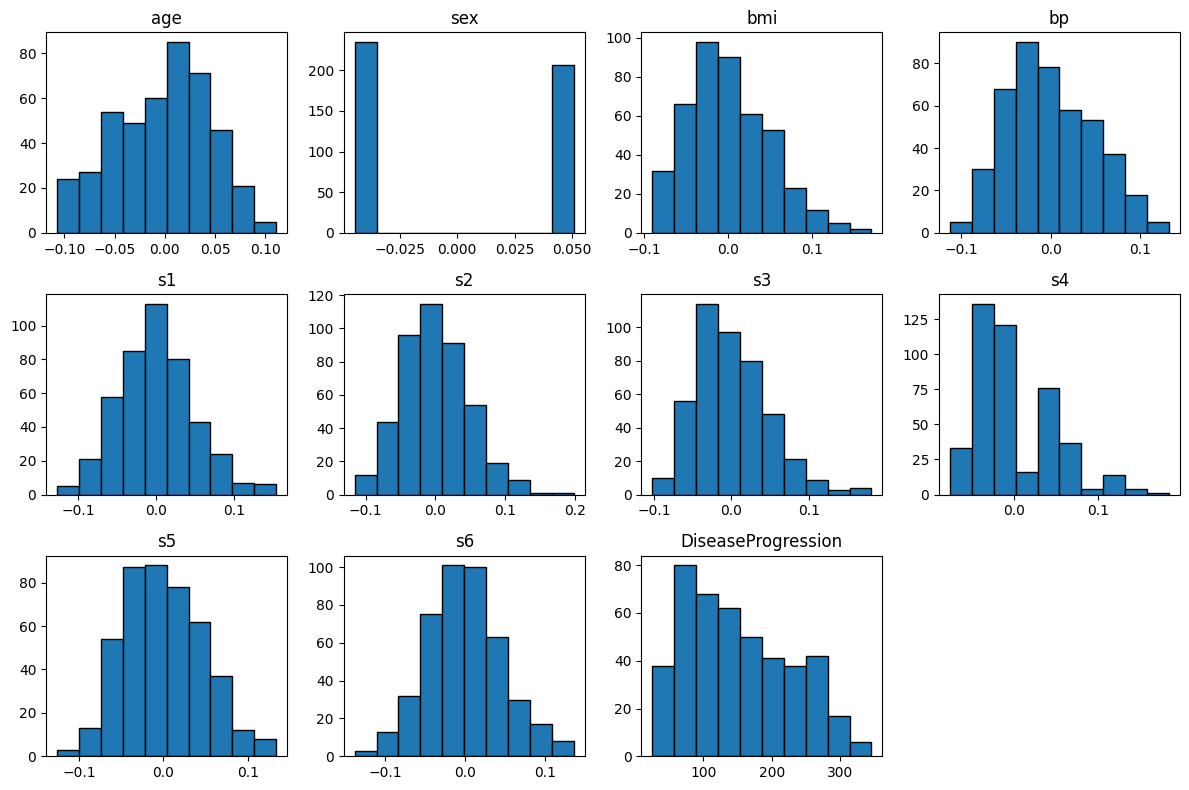

In [114]:
# This one we'll give you:
# Always useful to create histograms of the features when possible; the layout and formatting are sometimes awkward, so
# I use the following:

df_diabetes.hist(figsize=(12,8), layout=(3,4),grid=False,edgecolor='black')
plt.tight_layout()
plt.show()

### Part A:

- Generate the correlation matrix for all the features using Pandas' `.corr()` function, plot it as a heatmap, and give it an appropriate title.   
- Hint: Use `seaborn`'s `heatmap` function, imported in the first cell as `sns`.  (Have I mentioned you might want to read the docs?)


<Axes: >

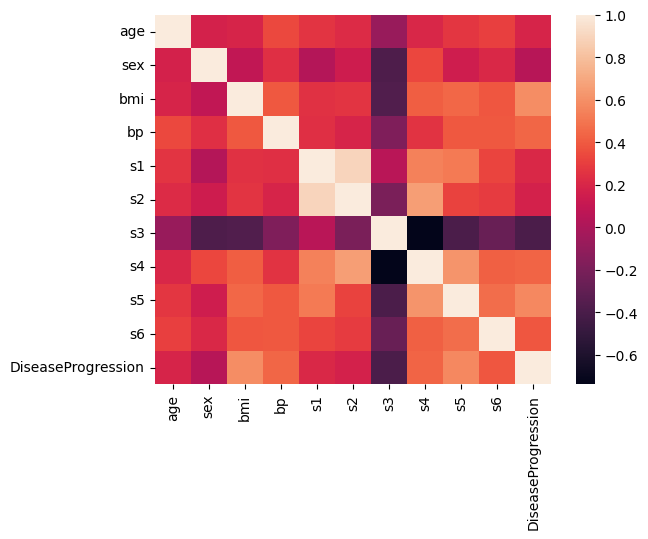

In [115]:
# Your code here

matrix = df_diabetes.corr()

sns.heatmap(matrix)

### Part B

- Now set `a4b` to the name of the feature which has the largest correlation with the target. 


In [116]:

target= matrix["DiseaseProgression"].drop("DiseaseProgression")
a4b = target.idxmax()

print(target)



age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
Name: DiseaseProgression, dtype: float64


In [117]:
grader.check("q4b")

q4b results: All test cases passed!

### Part C

- Next, in order to avoid any snickers when discussing the dataset, change the column name 'sex' to 'gender'
  in place and set the variable `a4c` to a numpy array of the feature/column names.
- Hint: if your answer starts `Index(...` then you have a Pandas data structure and not an ndarray as required. 


In [118]:
df_diabetes.rename(columns={'sex': 'gender'}, inplace=True)

a4c = np.array(df_diabetes.columns)

print(f'Feature names = {a4c}')

Feature names = ['age' 'gender' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6'
 'DiseaseProgression']


In [119]:
grader.check("q4c")

q4c results: All test cases passed!

### Part D

- Create dataset in the form `X,y` from the dataframe by dropping the last column to create `X`, and just selecting the last column to make `y`

- Note: `sklearn`'s models are perfectly happy to work with dataframes, so we can just keep them as such and not convert to ndarrays.  Two advantages are: you don't have to reshape for input to the model, and you keep the feature names in case you need them later, e.g., when doing feature selection. 

- Set `aa4d` to the pair  ( shape of `X`, shape of `y` )


In [120]:
X = df_diabetes.drop(columns=['DiseaseProgression'])
y = df_diabetes['DiseaseProgression']

a4d = (X.shape, y.shape)

print(f'(shape of X, shape of y) = {a4d}')


(shape of X, shape of y) = ((442, 10), (442,))


In [121]:
grader.check("q4d")

q4d results: All test cases passed!

### Part E


Now we will create two regression plots, the first for a univariate regression of just the most highly correlated feature, and
then on the whole data set.  (We'll return to the issue of feature importance in later weeks.)

- Create `X_uni` from `X` by selecting only the most highly correlated feature, and run a univariate regression with it against the target. 
- Assign `a4e` the **training MSE** by using the model to predict on `X_uni` and comparing the values with `y`. 
- As usual, round all floats to 4 decimal places.


In [122]:

X_uni = X[[a4b]]
model = LinearRegression()
model.fit(X_uni, y)
y_pred_E = model.predict(X_uni)

a4e = round(mean_squared_error(y, y_pred_E), 4)

print(f'MSE on most correlated feature = {a4e}')


MSE on most correlated feature = 3890.4566


In [123]:
grader.check("q4e")

q4e results: All test cases passed!

### Part F

- Now run multiple regression on the entire `X` and set `a4f` to the **training MSE** on `X`, rounded to 4 decimal places.


In [124]:
model_F = LinearRegression()
model_F.fit(X, y)
y_pred_F = model_F.predict(X)

a4f = round(mean_squared_error(y, y_pred_F), 4)

print(f'MSE on whole set = {a4f}')


MSE on whole set = 2859.6963


In [125]:
grader.check("q4f")

q4f results: All test cases passed!

### Part G: Testing for Generalization

We will spend the next two lessons thinking about how to evaluate  models for generalization, but let's try a naive strategy
for now:  We will split the dataset into training and testing sets, and see how the model performs on  data it has never seen.
The disadvantage of this is that we have less training data, of course!

- Use `sklearn`'s `train_test_split` to shuffle `X` and split it into 80% training data and 20% testing data with `random_state=42`
- Train a model `model_training` on the training set, and then test it on the same set to find the training MSE. 
- Assign the training MSE to `a4g`, with... you guessed it... 4 decimal points.  

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_G = LinearRegression()
model_G.fit(X_train, y_train)
y_pred_G = model_G.predict(X_train)

a4g = round(mean_squared_error(y_train, y_pred_G), 4)

print(f'Training MSE = {a4g}')


Training MSE = 2868.5497


In [127]:
grader.check("q4g")

q4g results: All test cases passed!

### Part H

- Run the model created in Part G on the testing set to determine the test MSE. 
- Set `a4h` to the test MSE, to 4 decimal points.

In [128]:
y_test_H = model_G.predict(X_test)

a4h = round(mean_squared_error(y_test, y_test_H), 4)


print(f'MSE on most correlated feature = {a4h}')


MSE on most correlated feature = 2900.1936


In [129]:
grader.check("q4h")

q4h results: All test cases passed!

### Part I

Now try setting the percentage of the test size to different values, perhaps 0.1, 0.2, 0.3, 0.4, and 0.5 and run the above
cells and observe the training and testing MSEs. Then choose the best answer below. 


**How Does the Training‐Set Size Affect MSE?**

1.  Both **training MSE** and **testing MSE** remain exactly the same regardless of how many points you use, provided you keep the `random_state` fixed.  
2.  Both **training MSE** and **testing MSE** steadily converge to **zero** once you exceed a certain training‐set size threshold (e.g., 30 points).  
3.  **Training MSE** usually goes **up** slightly with a bigger training set (it’s harder to fit more points perfectly), but **testing MSE** tends to go **down** (the model generalizes better with more data).  
4.  Both **training MSE** and **testing MSE** decrease when the training set grows, because the model memorizes a larger volume of data and thus reduces all errors.

In [130]:

a4i = 3           # your answer should one of 1, 2, 3, 4 


In [131]:
grader.check("q4i")

q4i results: All test cases passed!

### Part J

How many hours did you spend completing this homework? Set `a4j` to a integer giving the answer to this question. Any integer will receive full credit in the autograder. 

In [132]:

a4j = 7


In [133]:
grader.check("q4j")

q4j results: All test cases passed!